# Categorical Naive Bayes

The categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distributed. The categories of each feature are drawn from a categorical distribution.
- [Sklearn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html)
- [User guide Categorical Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#categorical-naive-bayes)
- [categorical naive bayes from scratch](https://www.kaggle.com/code/gautigadu091/categorical-naive-bayes-from-scratch-in-python/notebook)

In [1]:
import pandas as pd
from utils import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.naive_bayes import CategoricalNB
import matplotlib.pyplot as plt

from utils import preprocessing


In [2]:
# data loading
questions = pd.read_csv('data/question_data.csv', sep=';')
questions = questions.set_index('Unnamed: 0')  # set first column (question number) as index
data = pd.read_parquet('data/train.parquet')

d_questions = preprocessing.top_k_questions(keyword='descriptive', k=20, questions_df=questions, data=data, print_q=False)  # TODO: turnoff-print

target_feature = data[['q212813'] + d_questions.index.to_list()]
display(target_feature)

,q212813,q416235,q85419,q358084,q501,q77,q20930,q29829,q35660,q80,...,q79,q18834,q12970,q212814,q23834,q43261,q20418,q20725,q416236,q442
index,,,,,,,,,,,,,,,,,,,,,
28586,Centrist,Can't answer without a subtitle,"White (such as Chardonnay, Riesling).",Yes,No,Sometimes,Higher than average,Whenever possible,Usually,I never do drugs.,...,I smoke occasionally.,None,Twice or more a day,Somewhat important,Yes,I am my own person.,None,Rarely / never,Yay!,Good
8701,Liberal / Left-wing,Yes,Rosé (such as White Zinfindel).,Yes,No,Very often,Higher than average,Always,Usually,I never do drugs.,...,Never.,Knowledge,Twice or more a day,A little important,No,I consider their opinion but go my own way.,Sometimes,All the time,None,Bad
38781,Liberal / Left-wing,Yes,Rosé (such as White Zinfindel).,Yes,No,Sometimes,Average,Always,Usually,None,...,I smoke occasionally.,Knowledge,Twice or more a day,None,No,I am my own person.,Sometimes,Sometimes,Okay,Bad
31844,Centrist,Yes,"Red (such as Merlot, Cabernet, Shiraz).",Yes,No,Sometimes,Average,Whenever possible,Usually,I never do drugs.,...,"I smoked in the past, but no longer.",Knowledge,Once a day,Somewhat important,No,I consider their opinion but go my own way.,Sometimes,Sometimes,Okay,Bad
39046,Centrist,Can't answer without a subtitle,Rosé (such as White Zinfindel).,Yes,No,Sometimes,Average,Whenever possible,Usually,I never do drugs.,...,I smoke occasionally.,Love,Twice or more a day,Somewhat important,No,I consider their opinion but go my own way.,Yes,Sometimes,Okay,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21184,Other,Can't answer without a subtitle,Rosé (such as White Zinfindel).,Yes,No,Rarely,Average,Always,Always,I never do drugs.,...,Never.,Love,Twice or more a day,Somewhat important,None,I consider their opinion but go my own way.,Yes,Sometimes,None,Bad
67652,Other,Can't answer without a subtitle,"Red (such as Merlot, Cabernet, Shiraz).",Yes,No,Sometimes,Below average,Always,Rarely,I never do drugs.,...,Never.,Knowledge,Once a day,A little important,No,I consider their opinion but go my own way.,Sometimes,Sometimes,Yay!,Good
60546,Liberal / Left-wing,Yes,"Red (such as Merlot, Cabernet, Shiraz).",Yes,No,Sometimes,"Very, very high",Whenever possible,Always,I never do drugs.,...,"I smoked in the past, but no longer.",Love,Twice or more a day,Somewhat important,No,I consider their opinion but go my own way.,Sometimes,Sometimes,Yay!,Good


In [3]:
# preprocessing
target_feature = target_feature.dropna()
target_feature_enc = target_feature.apply(LabelEncoder().fit_transform)
print('shape', target_feature.shape)

shape (17492, 21)


In [4]:
# train test split
X = target_feature_enc.iloc[:, 1:]
y = target_feature_enc.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print('train set shapes: ', X_train.shape, y_train.shape)
print('test set shapes: ', X_test.shape, y_test.shape)


,q416235,q85419,q358084,q501,q77,q20930,q29829,q35660,q80,q4018,q79,q18834,q12970,q212814,q23834,q43261,q20418,q20725,q416236,q442
index,,,,,,,,,,,,,,,,,,,,
31844,2,1,1,0,2,0,3,3,2,1,2,1,0,2,0,3,1,2,1,0
39046,0,2,1,0,2,0,3,3,2,1,0,2,3,2,0,3,2,2,1,0
21628,0,1,1,1,1,2,3,3,2,1,3,1,3,0,0,3,2,1,1,0
51271,0,1,1,1,2,2,0,3,2,1,0,1,3,2,0,3,2,0,2,1
20492,0,2,1,0,2,2,0,3,2,1,3,2,3,3,0,3,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33094,2,1,1,1,3,3,0,1,3,1,0,1,0,3,1,3,1,2,2,1
59462,0,1,1,0,2,0,3,3,0,1,0,0,0,2,1,2,1,0,2,0
27366,1,2,1,0,2,2,0,3,3,1,2,0,3,1,0,3,2,2,2,0


index
31844    0
39046    0
21628    3
51271    3
20492    0
        ..
33094    2
59462    2
27366    3
67652    3
60546    2
Name: q212813, Length: 17492, dtype: int64

train set shapes:  (11719, 20) (11719,)
test set shapes:  (5773, 20) (5773,)


train accuracy 0.5200102397815514
test accuracy 0.5059760956175299


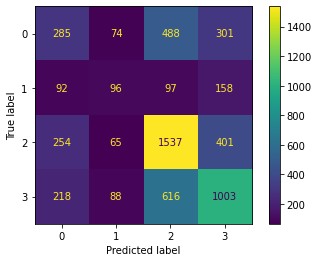

In [7]:
# Naive Bayes
clf = CategoricalNB()
clf.fit(X_train, y_train)
yhat_train = clf.predict(X_train)
yhat_test = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, yhat_train)
test_accuracy = accuracy_score(y_test, yhat_test)
print('train accuracy', train_accuracy)
print('test accuracy', test_accuracy)

ConfusionMatrixDisplay.from_predictions(y_test, yhat_test)
plt.show()